# Introduction to Supervised Learning and Classification.

This notebook provides a brief introduction to supervised learning and classification problems.

## 1. Machine Learning Paradigms

Machine learning can be broadly classified into three main paradigms:

- **Supervised Learning**: Learning from labeled data to make predictions on unseen data.
- **Unsupervised Learning**: Discovering patterns in unlabeled data.
- **Reinforcement Learning**: Learning optimal actions through trial and error to maximize a reward.

To illustrate the difference between supervised and unsupervised learning, we'll use the Iris dataset and apply both classification (supervised) and clustering (unsupervised) methods.

<img src="img/iris.png" alt="Irises" width="500">

The Iris dataset is a dataset consists of 50 samples of three species of Iris (iris setosa, Iris virginica and Iris versicolor), and four features were measured from each sample:

<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" alt="Petal and Sepal Diagram" width="300">


1. Sepal length
2. Sepal width
3. Petal length
4. Petal width



First, let's load the Iris dataset and visualize it.


In [4]:
# Import necessary libraries
# import os
# os.environ["KMP_DUPLICATE_LIB_OK"] = "True"

from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target


df = pd.DataFrame(X, columns=iris.feature_names)
df["target"] = y
df["species"] = df["target"].map(
    {i: species for i, species in enumerate(iris.target_names)}
)

# Let's see the first rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### Supervised Learning Example: Classification

We'll use a K-Nearest Neighbors (KNN) classifier to predict the species of iris flowers.

Don't worry if you don't know what KNN classifiers are at this point! Consider it as a simple blackbox function that learns to assign features to labels.

For a classification problem we are going to do the following steps:

1. Divide the dataset into a training and testing set
2. Train the classifier on the training set
3. Test the classifier on the testing set

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y,
)

# 2. Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.56%


**Discussion**: Why do we need to split the data into training and validation?

### Unsupervised Learning Example: Clustering

Now, we'll apply K-Means clustering to group the iris data without using the labels.


In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# # Retrieve the cluster labels
cluster_labels = kmeans.labels_

Unsupervised Learning Adjusted Rand Index: 0.72


### Visualizing the Results

Let's visualize the actual species versus the clusters identified by K-Means.


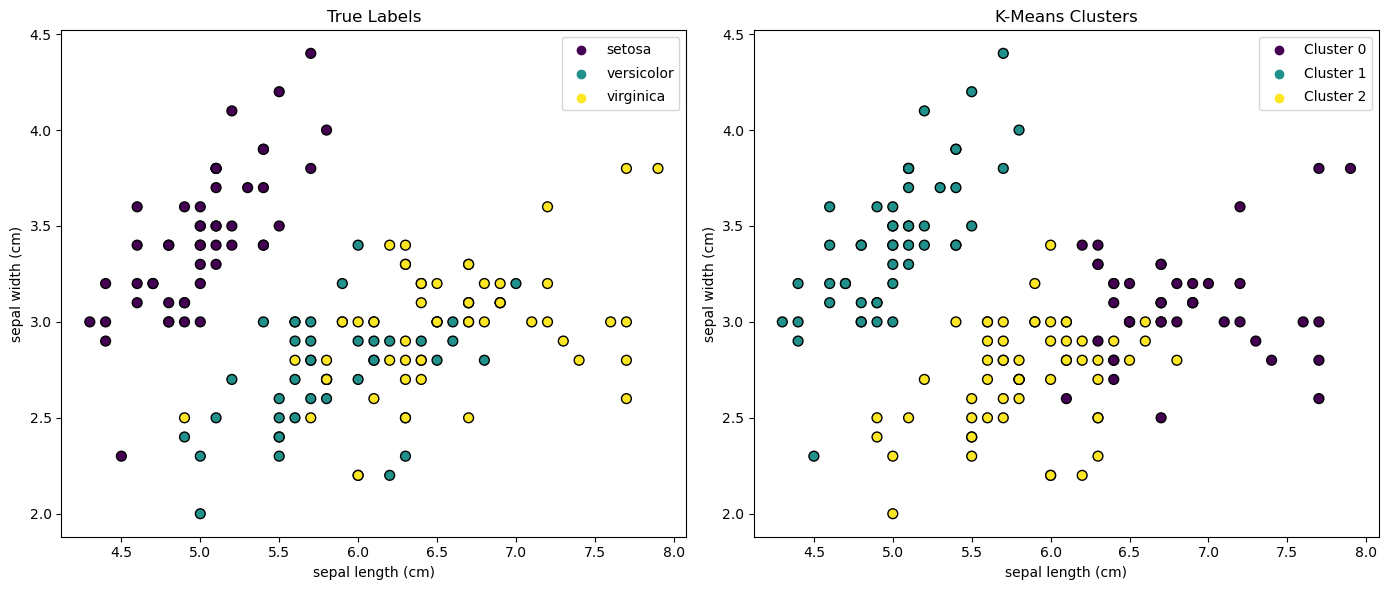

In [7]:
# # Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the feature indices for plotting
feature_x = 0  # Sepal length
feature_y = 1  # Sepal width

# Plot the true labels
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
scatter = plt.scatter(
    X[:, feature_x],
    X[:, feature_y],
    c=y,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("True Labels")
plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

# Manually create legend
classes = np.unique(y)
colors = [scatter.cmap(scatter.norm(value)) for value in classes]
labels = iris.target_names

for class_value, color, label in zip(classes, colors, labels):
    plt.scatter([], [], c=[color], label=label)
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.7)

# Plot the cluster labels
plt.subplot(1, 2, 2)
scatter = plt.scatter(
    X[:, feature_x],
    X[:, feature_y],
    c=cluster_labels,
    cmap="viridis",
    edgecolor="k",
    s=50,
)
plt.title("K-Means Clusters")
plt.xlabel(iris.feature_names[feature_x])
plt.ylabel(iris.feature_names[feature_y])

# Manually create legend for clusters
clusters = np.unique(cluster_labels)
colors = [scatter.cmap(scatter.norm(value)) for value in clusters]
labels = [f"Cluster {i}" for i in clusters]

for cluster, color, label in zip(clusters, colors, labels):
    plt.scatter([], [], c=[color], label=label)
plt.legend(
    scatterpoints=1,
    frameon=True,
    labelspacing=0.7,
)

plt.tight_layout()
plt.show()

**Explanation:**

- **Supervised Learning (Left Plot):** The data points are colored based on the true species labels. The classifier uses these labels during training to learn how to differentiate between species.
- **Unsupervised Learning (Right Plot):** The data points are colored based on the clusters identified by K-Means. The clustering algorithm groups the data without any prior knowledge of the species.

**Observation:**

- The supervised learning model achieves high accuracy because it learns from labeled data.
- The unsupervised learning model discovers inherent structures, but the clusters may not perfectly align with the actual species.